In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.2.0
tensorboard2.2.2
seaborn0.10.1
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14584829079325270240,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 467150767451179089
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6515012665
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 143357139260953954
 physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4634428891467192732
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/kaggle-flowers"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/kaggle-flowers"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/kaggle-flowers"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/kaggle-flowers"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/kaggle-flowers"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [7]:

cat_image = train_path + '/daisy/' + os.listdir(train_path + '/daisy')[0]
imread(cat_image).shape
# plt.imshow(imread(cat_image))

(313, 500, 3)

'../input/kaggle-flowers\\train/daisy/10391248763_1d16681106_n.jpg'

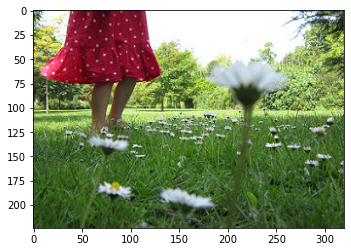

In [8]:
daisy_image = train_path + '/daisy/' + os.listdir(train_path + '/daisy/')[5]
plt.imshow(imread(daisy_image ))
daisy_image

In [9]:
# len(os.listdir(train_path + '/dogs'))

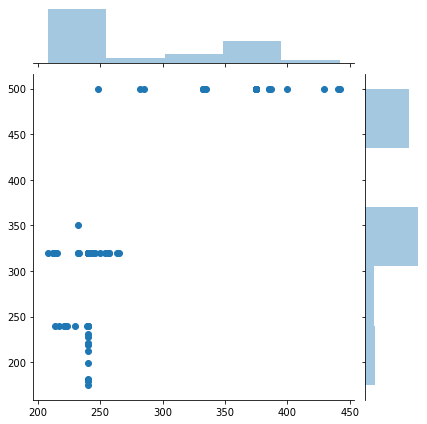

In [10]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path + '/daisy/'):
    img = imread(test_path+'/daisy/' + image_filename)
#     print (train_path+'\\dogs\\' + image_filename)
    d1,d2, _ = img.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(dim1, dim2)

In [11]:
np.mean(dim1)
imread(daisy_image).shape
image_shape =(250, 250, 3)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, rescale =1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
test_gen = ImageDataGenerator(rescale =1./255)

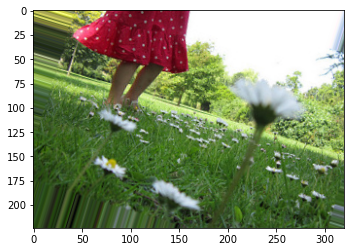

In [13]:
plt.imshow(imread(cat_image))
cat_image
plt.imshow(train_gen.random_transform(imread(daisy_image)))

In [14]:
# image_gen.flow_from_directory(train_path)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
batch_size=32

train_image_gen= train_gen.flow_from_directory(train_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='categorical')

test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='categorical')

train_image_gen.class_indices

Found 3573 images belonging to 5 classes.
Found 750 images belonging to 5 classes.


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten


# import keras_resnet.models
import keras

# x = keras.layers.Input(image_shape)
# base_model = keras_resnet.models.ResNet50(x, classes=1)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())


# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))



# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D, BatchNormalization
# from keras.models import Sequential,Model,load_model
# from keras import applications




# model = Sequential()

# model.add(applications.ResNet50(include_top=False, pooling=None, input_shape=image_shape))
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1, activation='sigmoid'))

# model.layers[0].trainable = False



# base_model = applications.ResNet152V2(weights= None, include_top=False, input_shape= image_shape)
# x = base_model.output
# # x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dense(1024, activation = 'relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(1, activation= 'sigmoid')(x)
# model = Model(inputs = base_model.input, outputs = predictions)

from tensorflow.keras.optimizers import SGD, Adam
opt = Adam(lr=0.0001)
# opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

results = model.fit(train_image_gen, epochs=20, verbose = 1, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20
112/112 [==============================] - 43s 384ms/step - loss: 1.4486 - accuracy: 0.3487 - val_loss: 1.1742 - val_accuracy: 0.4533
Epoch 2/20
112/112 [==============================] - 45s 401ms/step - loss: 1.2557 - accuracy: 0.4593 - val_loss: 1.1137 - val_accuracy: 0.5373
Epoch 3/20
112/112 [==============================] - 46s 414ms/step - loss: 1.1661 - accuracy: 0.5083 - val_loss: 1.0605 - val_accuracy: 0.5960
Epoch 4/20
112/112 [==============================] - 48s 425ms/step - loss: 1.1108 - accuracy: 0.5472 - val_loss: 0.9842 - val_accuracy: 0.6133
Epoch 5/20
112/112 [==============================] - 50s 446ms/step - loss: 1.0622 - accuracy: 0.5707 - val_loss: 0.9380 - val_accuracy: 0.6520
Epoch 6/20
112/112 [==============================] - 52s 463ms/step - loss: 1.0203 - accuracy: 0.5956 - val_loss: 0.9161 - val_accuracy: 0.6373
Epoch 7/20
112/112 [==============================] - 55s 495ms/step - loss: 1.0086 - accuracy: 0.5995 - val_loss: 0.8986 - val_ac

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 247, 247, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [18]:
# model.save('flowers')

In [19]:
import pandas as pd

# pd.DataFrame.from_dict(results.history).to_csv('history_flowers.csv',index=False)

In [20]:
history_dict = pd.read_csv("history_catsdogs.csv")

In [24]:
model.history.history

{'loss': [1.574092149734497,
  1.4494413137435913,
  1.3520666360855103,
  1.2916502952575684,
  1.2227979898452759,
  1.1841295957565308,
  1.1506297588348389,
  1.1065336465835571,
  1.066464900970459,
  1.0182133913040161],
 'accuracy': [0.26084521412849426,
  0.35460397601127625,
  0.4005037844181061,
  0.4494822323322296,
  0.47802966833114624,
  0.5020990967750549,
  0.5286873579025269,
  0.5555555820465088,
  0.574027419090271,
  0.600055992603302],
 'val_loss': [1.4159635305404663,
  1.2615370750427246,
  1.1928948163986206,
  1.0969831943511963,
  1.0649964809417725,
  1.0332025289535522,
  1.0609577894210815,
  1.0218585729599,
  0.958260178565979,
  0.9015560150146484],
 'val_accuracy': [0.3253333270549774,
  0.437333345413208,
  0.48533332347869873,
  0.5120000243186951,
  0.5733333230018616,
  0.5586666464805603,
  0.5506666898727417,
  0.5973333120346069,
  0.6079999804496765,
  0.6600000262260437]}

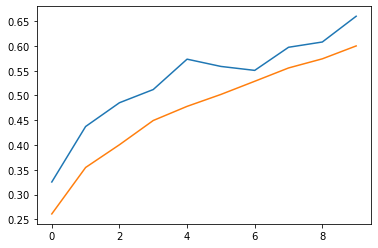

In [26]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])

In [ ]:
model.evaluate_generator(train_image_gen)

In [ ]:
pred = model.predict(train_image_gen)

In [ ]:
predictions = pred > 0.5

In [ ]:
pred
len(pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions))

In [ ]:
confusion_matrix(test_image_gen.classes, predictions)

In [ ]:
dog_image

In [ ]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(dog_image, target_size=image_shape)
my_image

In [ ]:
help(image.load_img)

In [ ]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape

In [ ]:
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

In [ ]:
model.predict(my_img_arr)

In [ ]:
# ! pip install keras-resnet